In [1]:
!pip install shap

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier

import shap

In [3]:
# Load the dataset
df = pd.read_excel("HR Analytics.xlsx")

# Display first 5 rows
df.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,...,3,80,0,0,2,3,0,0,0,0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,...,1,80,0,0,2,3,0,0,0,0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,...,4,80,0,0,3,3,0,0,0,0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,...,4,80,0,0,2,3,0,0,0,0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,...,4,80,0,0,0,3,0,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1417 entries, 0 to 1416
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmpID                     1417 non-null   object
 1   Age                       1417 non-null   int64 
 2   AgeGroup                  1417 non-null   object
 3   Attrition                 1417 non-null   object
 4   BusinessTravel            1417 non-null   object
 5   DailyRate                 1417 non-null   int64 
 6   Department                1417 non-null   object
 7   DistanceFromHome          1417 non-null   int64 
 8   Education                 1417 non-null   int64 
 9   EducationField            1417 non-null   object
 10  EmployeeCount             1417 non-null   int64 
 11  EmployeeNumber            1417 non-null   int64 
 12  EnvironmentSatisfaction   1417 non-null   int64 
 13  Gender                    1417 non-null   object
 14  HourlyRate              

In [5]:
df.isnull().sum()

EmpID                       0
Age                         0
AgeGroup                    0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
SalarySlab                  0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBa

In [6]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Convert all object (categorical) columns
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

In [7]:
# Assuming 'Attrition' is the target variable
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

C:\Users\USer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [10]:
y_pred = lr.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8767605633802817

Confusion Matrix:
 [[240   2]
 [ 33   9]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       242
           1       0.82      0.21      0.34        42

    accuracy                           0.88       284
   macro avg       0.85      0.60      0.64       284
weighted avg       0.87      0.88      0.84       284



In [12]:
import shap

# SHAP expects background data, here we use training data
explainer = shap.Explainer(lr, X_train)
shap_values = explainer(X_test)

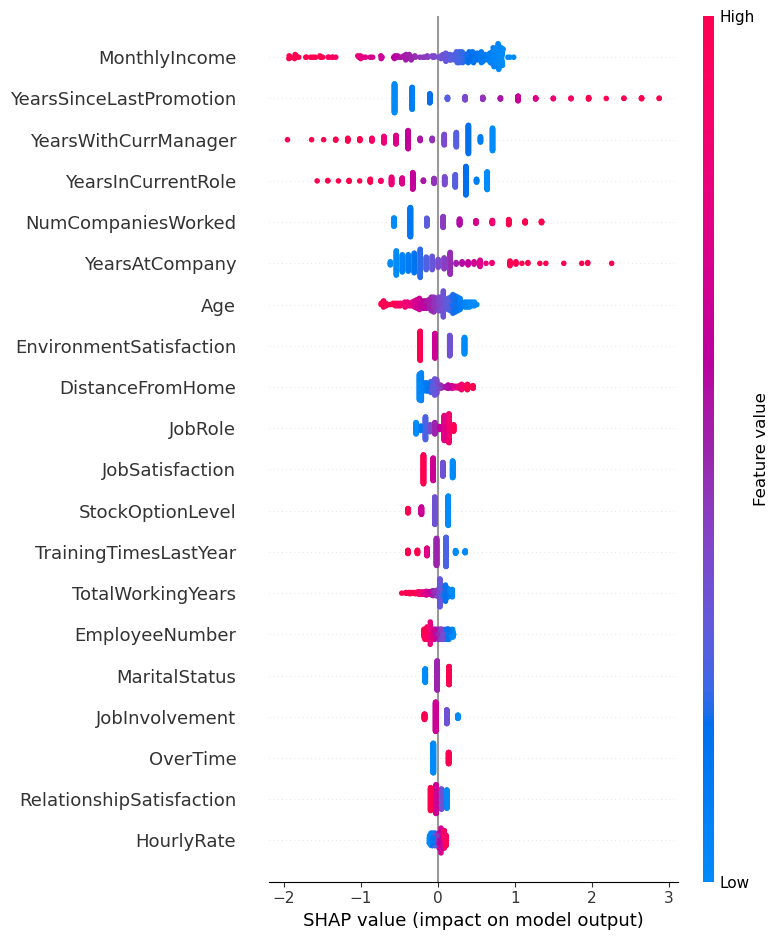

In [13]:
shap.summary_plot(shap_values, X_test)